In [1]:
import pandas as pd

# Read the data and set the preference
data = pd.read_excel('/Users/mac/Desktop/IB3K5/CustomerShoppingTrends.xlsx')
pd.set_option('display.max_rows', None)  

def write_correlations_to_file(correlation_matrix, file_name):
    """Function to write the correlation result to a file"""
    correlations = correlation_matrix['Purchase Amount (USD)'].drop('Purchase Amount (USD)', errors='ignore')
    with open(file_name, 'w') as file:
        for index, value in correlations.items():
            file.write(f"{index} {value}\n")

def calculate_absolute_average(file_name):
    """Function to calculate the absolute average from the specific file"""
    total_abs_value = 0
    count = 0
    with open(file_name, 'r') as file:
        for line in file:
            try:
                value = float(line.split()[-1]) 
                total_abs_value += abs(value)
                count += 1
            except ValueError as e:
                print(f"Error processing line: {line.strip()}")
    return total_abs_value / count if count > 0 else None

columns = ['Item Purchased', 'Category', 'Location', 'Color', 'Season']
for column in columns:
    grouped_data = data.groupby([column])['Purchase Amount (USD)'].mean().reset_index()
    data_encoded = pd.get_dummies(grouped_data, columns=[column])
    correlation_matrix = data_encoded.corr()
    file_name = f"{column}_Coefficient.txt"
    write_correlations_to_file(correlation_matrix, file_name)
    absolute_average = calculate_absolute_average(file_name)
    print(f"Absolute average correlation of {column} is: {absolute_average}")


Absolute average correlation of Item Purchased is: 0.17175357165548827
Absolute average correlation of Category is: 0.4965031495439771
Absolute average correlation of Location is: 0.11569864902235837
Absolute average correlation of Color is: 0.16015123406220333
Absolute average correlation of Season is: 0.541658837777322


In [2]:
import pandas as pd

# Read the data and set the preference
data = pd.read_excel('/Users/mac/Desktop/IB3K5/CustomerShoppingTrends.xlsx')
pd.set_option('display.max_rows', None)

# Group the data by location, color, and calculate the mean purchase amount
grouped_data = data.groupby(['Location', 'Color'])['Purchase Amount (USD)'].mean().reset_index()

# Set a dictionary to store the absolute average value
absolute_averages = {}

for location in grouped_data['Location'].unique():
    # Filter the data by location
    location_data = grouped_data[grouped_data['Location'] == location]

    # Encode and set dummy varibables for color
    data_encoded = pd.get_dummies(location_data, columns=['Color']).drop(columns=['Location'])

    # Calculate the correlation matrix
    correlation_matrix = data_encoded.corr()

    # Write the output file to store the result for each location
    file_name = f'correlation_{location}.txt'
    with open(file_name, 'w') as file:
        # Pearson correlation calculating and exclude self-correlation
        correlations = correlation_matrix['Purchase Amount (USD)'].drop('Purchase Amount (USD)', errors='ignore')
        for index, value in correlations.items():
            file.write(f"{index} {value}\n")

    def calculate_absolute_average(file_name):
        """Calculate the absolute average for each location"""
        total_abs_value = 0
        count = 0

        with open(file_name, 'r') as file:
            for line in file:
                splitParts = line.split()
                if len(splitParts) == 2:
                    try:
                        value = float(splitParts[1])
                        total_abs_value += abs(value)
                        count += 1
                    except ValueError:
                        print(f"Error converting {splitParts[1]} to float.")

        if count > 0:
            return total_abs_value / count
        else:
            return None  

    absolute_average = calculate_absolute_average(file_name)
    absolute_averages[location] = absolute_average

# Find the top 3 cities and print the result
top_3_locations = sorted(absolute_averages.items(), key=lambda x: x[1], reverse=True)[:3]
print("Top 3 locations with the highest absolute average correlations:")
for location, absolute_average in top_3_locations:
    print(f"{location}: {absolute_average}")


Top 3 locations with the highest absolute average correlations:
Arizona: 0.188534312269477
Kansas: 0.18803340531911636
Rhode Island: 0.18271596232634027


In [3]:
import pandas as pd

# Read the data and set the preference
data = pd.read_excel('/Users/mac/Desktop/IB3K5/CustomerShoppingTrends.xlsx')
pd.set_option('display.max_rows', None)

# For loop to filter the data by categories
for category_value in data['Category'].unique():
    filtered_data = data[data['Category'] == category_value]
    
    # Group the data by location, color, and calculate the mean purchase amount
    grouped_data = filtered_data.groupby(['Location', 'Color'])['Purchase Amount (USD)'].mean().reset_index()
    
    # Set a dictionary to store the absolute average value
    absolute_averages = {}

    for location in grouped_data['Location'].unique():
        # Filter the data by location
        location_data = grouped_data[grouped_data['Location'] == location]

        # Encode and set dummy varibables for color
        data_encoded = pd.get_dummies(location_data, columns=['Color']).drop(columns=['Location'])

        # Calculate the correlation matrix
        correlation_matrix = data_encoded.corr()

        # Output file to store the result for each location and category
        file_name = f'correlation_{category_value}_{location}.txt'
        with open(file_name, 'w') as file:
            # Pearson correlation calculating and exclude self-correlation
            correlations = correlation_matrix['Purchase Amount (USD)'].drop('Purchase Amount (USD)', errors='ignore')
            for index, value in correlations.items():
                file.write(f"{index}: {value}\n")

In [4]:
import pandas as pd

# Read the data and set the preference
data = pd.read_excel('/Users/mac/Desktop/IB3K5/CustomerShoppingTrends.xlsx')
pd.set_option('display.max_rows', None)

#Group the data and count the occurrences(per category and location)
color_counts = data.groupby(['Location', 'Category', 'Color']).size().reset_index(name='Count')

# Find the maximum count for each group
max_count = color_counts.groupby(['Location', 'Category'])['Count'].transform(max)
result= color_counts[color_counts['Count'] == max_count]

# Filter and find the result for the top 3 locations
locations = ['Arizona', 'Kansas', 'Rhode Island']
location_result = result[result['Location'].isin(locations)]
print(location_result.to_string(index=False))

    Location    Category     Color  Count
     Arizona Accessories     Green      3
     Arizona Accessories     Olive      3
     Arizona    Clothing      Gold      4
     Arizona    Clothing    Purple      4
     Arizona    Footwear     Beige      1
     Arizona    Footwear      Cyan      1
     Arizona    Footwear    Indigo      1
     Arizona    Footwear     Peach      1
     Arizona    Footwear      Pink      1
     Arizona    Footwear    Yellow      1
     Arizona   Outerwear      Cyan      2
      Kansas Accessories     Green      2
      Kansas Accessories Turquoise      2
      Kansas Accessories     White      2
      Kansas    Clothing     Beige      3
      Kansas    Clothing    Violet      3
      Kansas    Clothing     White      3
      Kansas    Footwear      Gray      2
      Kansas    Footwear     Green      2
      Kansas    Footwear   Magenta      2
      Kansas    Footwear    Purple      2
      Kansas    Footwear     White      2
      Kansas   Outerwear    Indigo

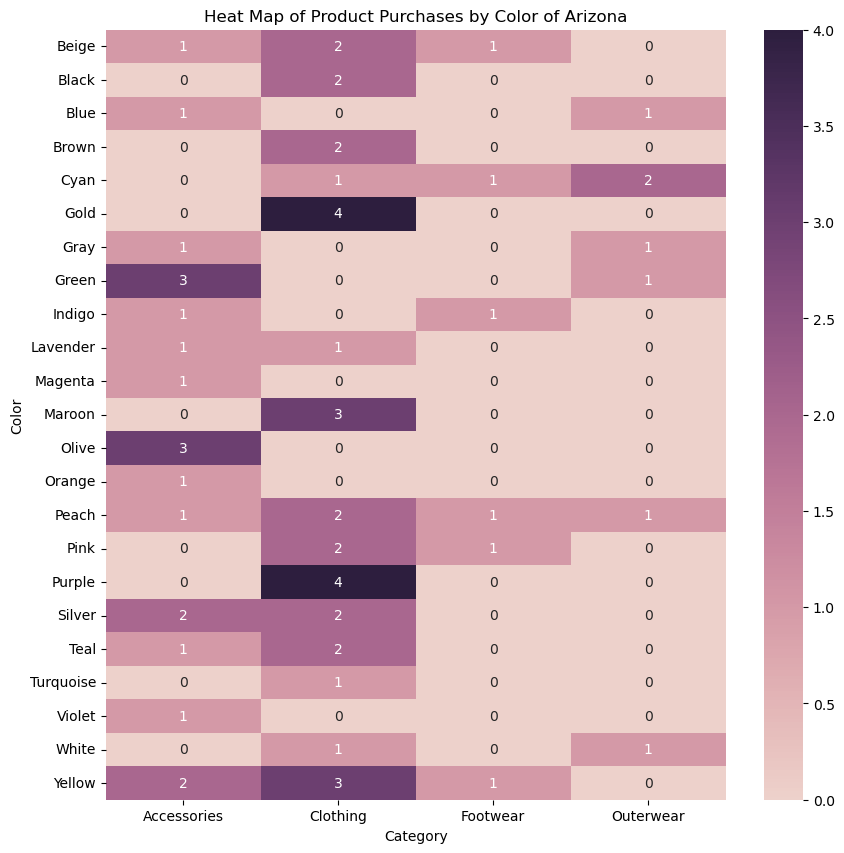

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Accessories': [1, 0, 1, 0, 0, 0, 1, 3, 1, 1, 1, 0, 3, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2],
    'Clothing': [2, 2, 0, 2, 1, 4, 0, 0, 0, 1, 0, 3, 0, 0, 2, 2, 4, 2, 2, 1, 0, 1, 3],
    'Footwear': [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    'Outerwear': [0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
}
colors = ['Beige', 'Black', 'Blue', 'Brown', 'Cyan', 'Gold', 'Gray', 'Green', 'Indigo', 'Lavender', 
          'Magenta', 'Maroon', 'Olive', 'Orange', 'Peach', 'Pink', 'Purple', 'Silver', 'Teal', 'Turquoise', 
          'Violet', 'White', 'Yellow']
df = pd.DataFrame(data, index=colors)

# Draw the heatmap 
plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Heat Map of Product Purchases by Color of Arizona')
plt.ylabel('Color')
plt.xlabel('Category')
plt.show()

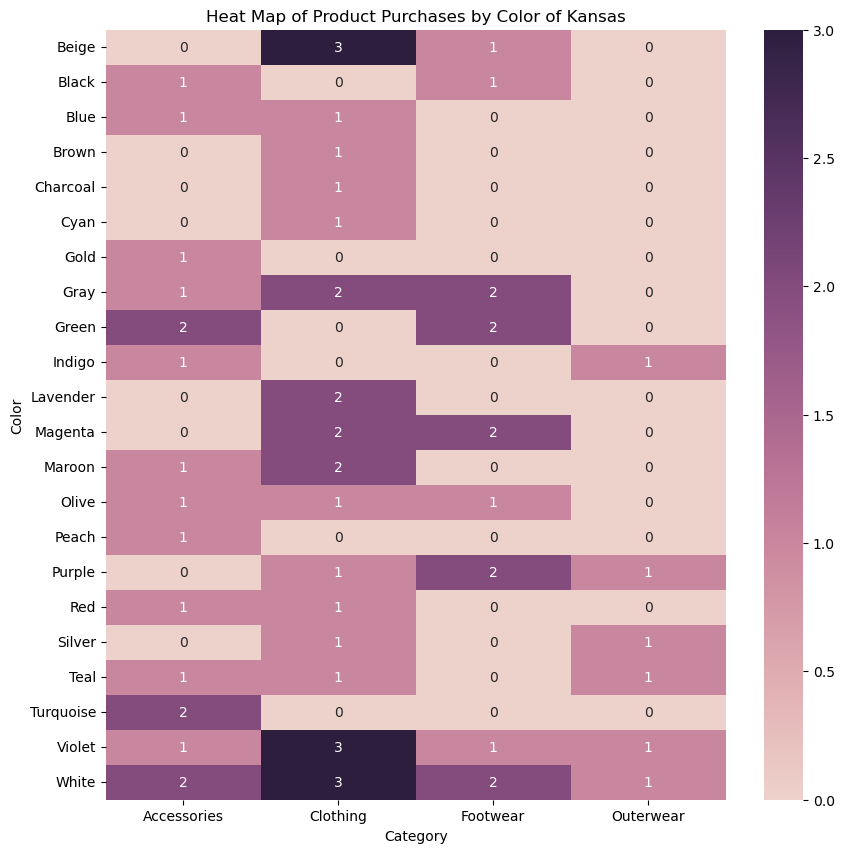

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Accessories': [0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2],
    'Clothing': [3, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 3, 3],
    'Footwear': [1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2],
    'Outerwear': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1]
}
colors = ['Beige', 'Black', 'Blue', 'Brown', 'Charcoal', 'Cyan', 'Gold', 'Gray', 'Green', 'Indigo', 'Lavender', 
          'Magenta', 'Maroon', 'Olive','Peach', 'Purple', 'Red', 'Silver', 'Teal', 'Turquoise', 
          'Violet', 'White']
df = pd.DataFrame(data, index=colors)

# Draw the heatmap 
plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Heat Map of Product Purchases by Color of Kansas')
plt.ylabel('Color')
plt.xlabel('Category')
plt.show()

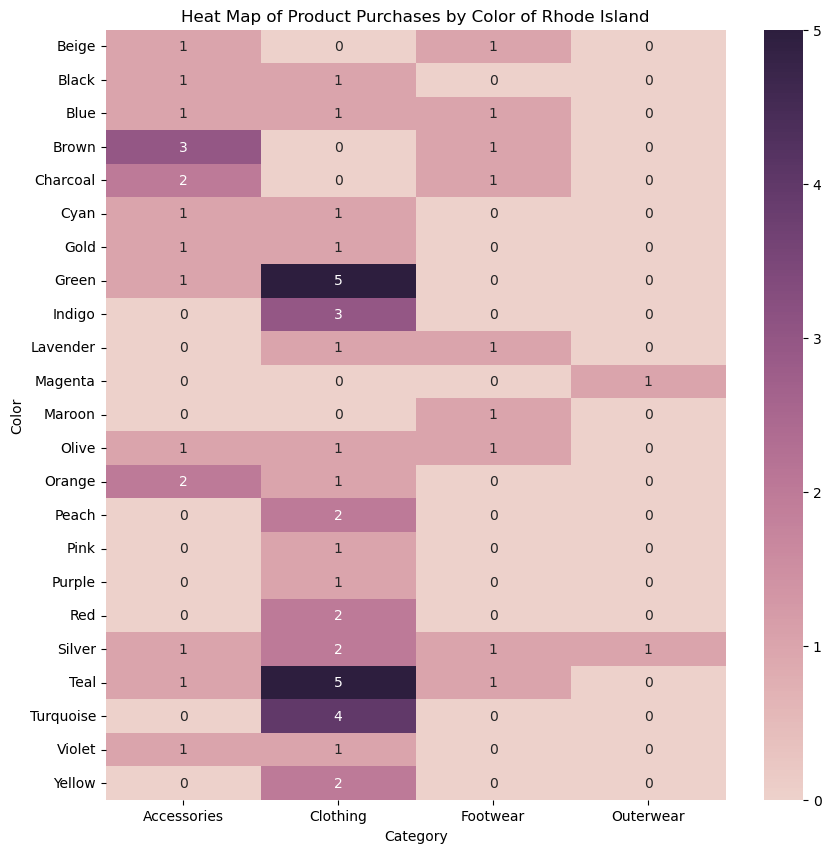

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Accessories': [1, 1, 1, 3, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0],
    'Clothing': [0, 1, 1, 0, 0, 1, 1, 5, 3, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 5, 4, 1, 2],
    'Footwear': [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    'Outerwear': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}
colors = ['Beige', 'Black', 'Blue', 'Brown', 'Charcoal','Cyan', 'Gold', 'Green', 'Indigo', 'Lavender', 
          'Magenta', 'Maroon', 'Olive', 'Orange', 'Peach', 'Pink', 'Purple', 'Red', 'Silver', 'Teal', 'Turquoise', 
          'Violet', 'Yellow']
df = pd.DataFrame(data, index=colors)

# Draw the heatmap 
plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Heat Map of Product Purchases by Color of Rhode Island')
plt.ylabel('Color')
plt.xlabel('Category')
plt.show()

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


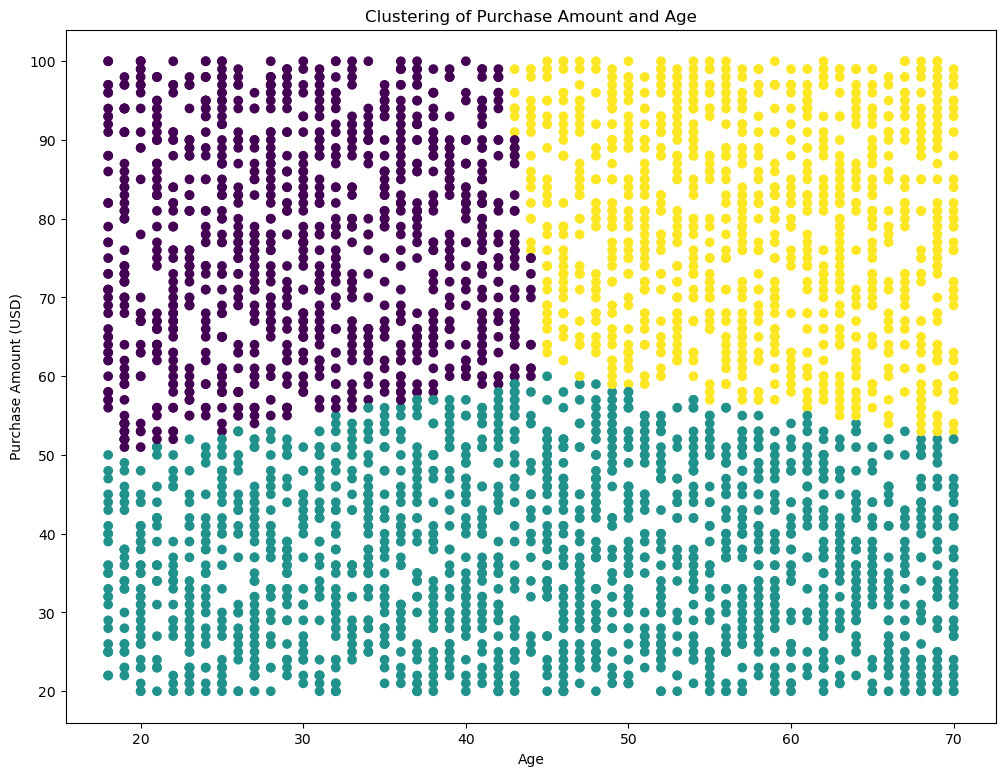

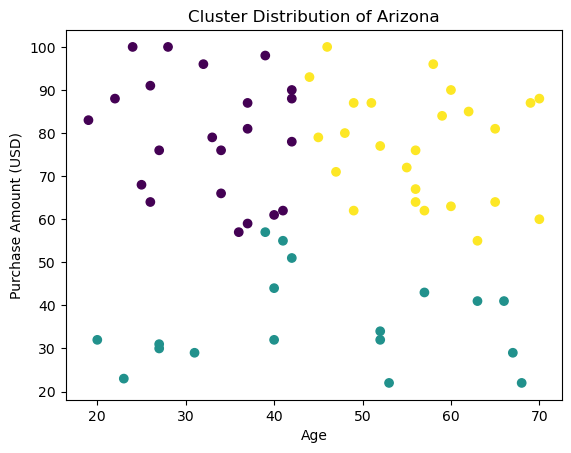

Cluster Type Number of Arizona is: 
ClusterYellow    25
ClusterPurple    22
ClusterGreen    18


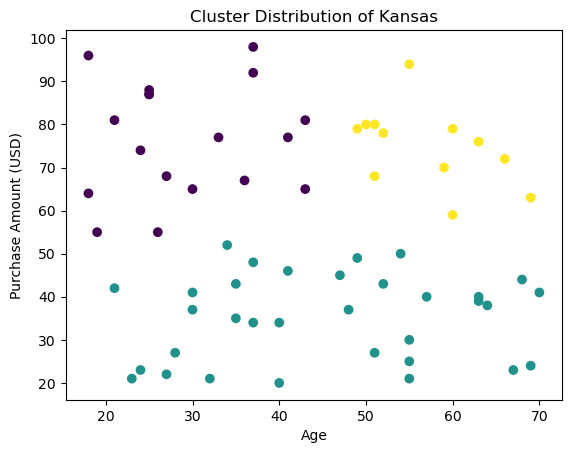

Cluster Type Number of Kansas is: 
ClusterGreen    33
ClusterPurple    18
ClusterYellow    12


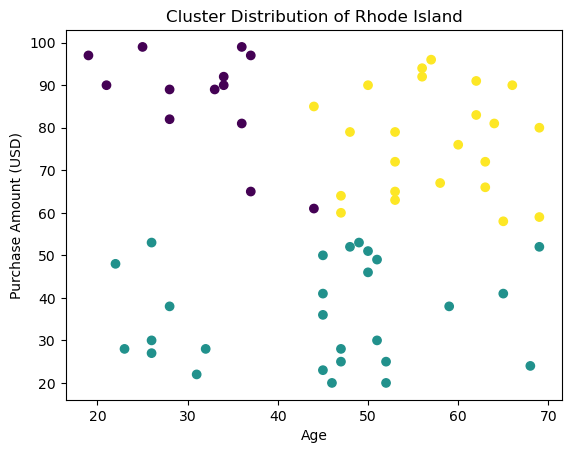

Cluster Type Number of Rhode Island is: 
ClusterGreen    27
ClusterYellow    23
ClusterPurple    13


In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the data and set the preference
data = pd.read_excel('/Users/mac/Desktop/IB3K5/CustomerShoppingTrends.xlsx')
pd.set_option('display.max_rows', None)

# Cluster data by KMeans
cluster_data = data[['Age', 'Purchase Amount (USD)']]
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(cluster_data)

# Draw the Scatter Plot
plt.figure(figsize=(12, 9)) 
plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Clustering of Purchase Amount and Age')
plt.show()

# Name the Cluster
cluster_map = {0: 'ClusterPurple', 1: 'ClusterGreen', 2: 'ClusterYellow'} 

# Set a new column 'Cluster' and 'ClusterType'
data['Cluster'] = clusters
data['ClusterType'] = data['Cluster'].map(cluster_map)

# Cluster for Arizona
arizona_data = data[data['Location'] == 'Arizona']
arizona_cluster_counts = arizona_data['ClusterType'].value_counts()
plt.scatter(arizona_data['Age'], arizona_data['Purchase Amount (USD)'], c=arizona_data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Cluster Distribution of Arizona')
plt.show()
print('Cluster Type Number of Arizona is: ')
for item in arizona_cluster_counts.items():
    print(f"{item[0]}    {item[1]}")


# Cluster for Kansas
kansas_data = data[data['Location'] == 'Kansas']
kansas_cluster_counts = kansas_data['ClusterType'].value_counts()
plt.scatter(kansas_data['Age'], kansas_data['Purchase Amount (USD)'], c=kansas_data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Cluster Distribution of Kansas')
plt.show()
print('Cluster Type Number of Kansas is: ')
for item in kansas_cluster_counts.items():
    print(f"{item[0]}    {item[1]}")

# Cluster for Rhode Island
rhode_island_data = data[data['Location'] == 'Rhode Island']
rhode_island_cluster_counts = rhode_island_data['ClusterType'].value_counts()
plt.scatter(rhode_island_data['Age'], rhode_island_data['Purchase Amount (USD)'], c=rhode_island_data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Cluster Distribution of Rhode Island')
plt.show()
print('Cluster Type Number of Rhode Island is: ')
for item in rhode_island_cluster_counts.items():
    print(f"{item[0]}    {item[1]}")


